<br>
# ** 6 ARIMA Analysis**
통계를 활용한 시계열 데이터 분석

<br><br>
## **ARIMA 시계열 분석을 활용한 주가예측**

### **1 시계열 데이터의 AR, MA 특성 찾기**
1. **AR(자기회귀)의 특성** : 고유한 값을 기준으로 이동
1. **MA(이동평균)의 특성** : 이동평균

In [1]:
# from pandas_datareader import get_data_yahoo
# start_date = '2013-01-01'
# codes = ['KO', 'MS', '005930.KS', '000660.KS']
# result = {}
# for code in codes:
#     result[code] = get_data_yahoo(code, start_date).Close

# import pandas as pd
# prices = pd.DataFrame(result)

# prices = prices.fillna(method='ffill')
# prices = prices.dropna()                
# prices.to_csv('./data/stocks.csv', encoding="ms949")
# prices.tail(3)

In [2]:
# 저장된 CSV 파일을 사용한다

import pandas as pd
prices = pd.read_csv('./data/stocks.csv')
prices = prices.set_index('Date')
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2013-01-02 to 2018-06-11
Data columns (total 4 columns):
KO           1410 non-null float64
MS           1410 non-null float64
005930.KS    1410 non-null float64
000660.KS    1410 non-null float64
dtypes: float64(4)
memory usage: 55.1 KB


In [3]:
price = prices.MS
price = price['2016-07-01': '2016-12-31']
price.tail()

Date
2016-12-26    43.060001
2016-12-27    43.119999
2016-12-28    42.619999
2016-12-29    42.150002
2016-12-30    42.250000
Name: MS, dtype: float64

<br>
### ** 01-1. ACF & PACF Plots**
1. AR이 크면 ACF는 천천히 감소, **PACF는 급격**하게 감소
1. MA가 크면 **ACF는 급격**히 감소, PACF는 천천히 감소

> pip &nbsp;&nbsp; install &nbsp;&nbsp; statsmodels==0.8.0

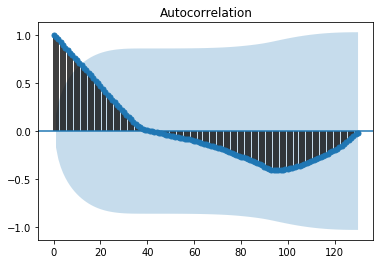

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(price)
plt.show()

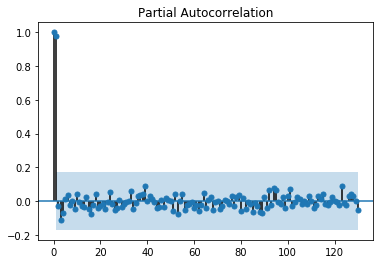

In [5]:
plot_pacf(price)
plt.show()

<br>
### ** 01-2. ACF & PACF Plots 2**

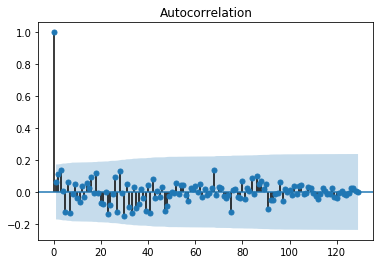

In [6]:
diff_1 = price.diff(periods=1).dropna()
plot_acf(diff_1)
plt.show()

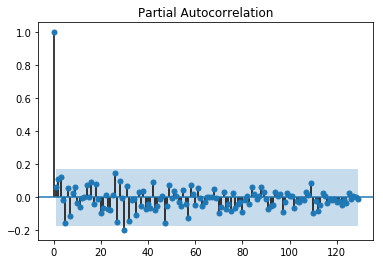

In [7]:
plot_pacf(diff_1)
plt.show()

<br>
## ** 2 모형을 만들고 통계적 검정**
statemodels

<br>
### **01 선형회귀모델의 생성 및 통계적해석**
**OLS**

In [8]:
from sklearn.datasets import load_iris 
data = load_iris()

import pandas as pd
df = pd.DataFrame(data.data)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['class'] = [data.target_names[no]   for no in data.target]
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Text(0.5,0,'Sepal Width')

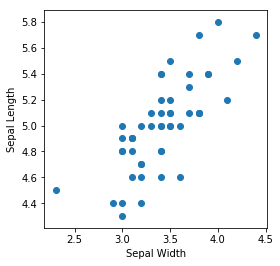

In [9]:
# 'sepal_width', 'sepal_length'
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['sepal_width'][:50], df['sepal_length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')

In [10]:
import statsmodels.api as sm

y = df['sepal_length'][:50]
x = df['sepal_width'][:50]
X = sm.add_constant(x)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           4.75e-10
Time:                        16:37:15   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

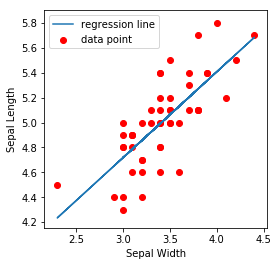

In [11]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.legend()

<br>
### **02 ARMA 모델의 생성 및 통계적해석**
**ARMA**

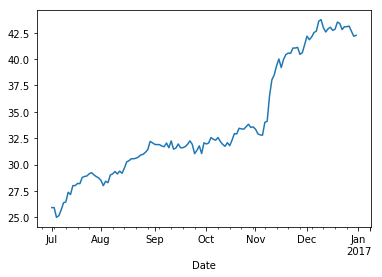

In [12]:
price.plot()

In [13]:
import statsmodels.tsa.api as tsa
ARMA = tsa.ARMA(price, order =(2, 1))
ARMA

In [14]:
ARMA_results= ARMA.fit()
ARMA_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 208.9308  
Dependent Variable: MS               Log-Likelihood:      -92.277   
Date:               2018-06-11 16:37 Scale:               1.0000    
No. Observations:   131              Method:              css-mle   
Df Model:           4                Sample:              07-01-2016
Df Residuals:       127                                   12-30-2016
Converged:          1.0000           S.D. of innovations: 0.476     
AIC:                194.5548         HQIC:                200.396   
---------------------------------------------------------------------
            Coef.   Std.Err.     t      P>|t|     [0.025      0.975] 
---------------------------------------------------------------------
const      39.8576  640.9964    0.0622  0.9505  -1216.4722  1296.1874
ar.L1.MS    1.9731    0.0033  590.2741  0.0000      1.9665     1.9796
ar.L2.MS   -0.9733    0.0122  -80.0569  0.0000     -0.9971    -0.9494
ma.L1.MS   -0.9087    0.6227   -1.4593  0.1470     -2.1292     0.3118
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.0136            -0.0024           1.0136            -0.0004
AR.2            1.0136             0.0024           1.0136             0.0004
MA.1            1.1005             0.0000           1.1005             0.0000
====================================================================

"""

### **03 ARIMA 모델의 생성 및 통계적해석**
**ARIMA**

In [15]:
from statsmodels.tsa.arima_model import ARIMA

model     = ARIMA (price, order = (0, 0, 3))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                     MS   No. Observations:                  131
Model:                     ARMA(0, 3)   Log Likelihood                -225.805
Method:                       css-mle   S.D. of innovations              1.308
Date:                Mon, 11 Jun 2018   AIC                            461.609
Time:                        16:37:16   BIC                            475.985
Sample:                    07-01-2016   HQIC                           467.451
                         - 12-30-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8328      0.553     61.165      0.000      32.749      34.917
ma.L1.MS       1.4846      0.037     40.541      0.000       1.413       1.556
ma.L2.MS       1.5323      0.057     26.796      0.0

/home/markbaum/Python/python/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [16]:
model = ARIMA(price, order = (0,0,3))
model_fit = model.fit(trend = 'c', full_output = True, disp = 1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                     MS   No. Observations:                  131
Model:                     ARMA(0, 3)   Log Likelihood                -225.805
Method:                       css-mle   S.D. of innovations              1.308
Date:                Mon, 11 Jun 2018   AIC                            461.609
Time:                        16:37:16   BIC                            475.985
Sample:                    07-01-2016   HQIC                           467.451
                         - 12-30-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8328      0.553     61.165      0.000      32.749      34.917
ma.L1.MS       1.4846      0.037     40.541      0.000       1.413       1.556
ma.L2.MS       1.5323      0.057     26.796      0.0

/home/markbaum/Python/python/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


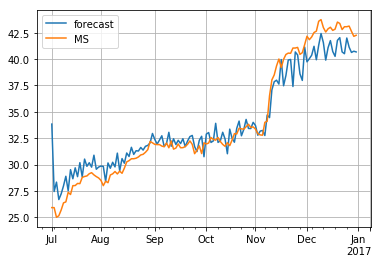

In [17]:
model_fit.plot_predict()
plt.grid()
plt.show()

### **04 ARIMA 모델로 데이터 예측하기**
**ARIMA Forcast**

In [18]:
fore = model_fit.forecast(steps = 10)
len(fore)

3

In [19]:
fore[0]

array([40.08894159, 37.48880583, 35.21725227, 33.83283769, 33.83283769,
       33.83283769, 33.83283769, 33.83283769, 33.83283769, 33.83283769])

In [20]:
fore[1]

array([1.30815564, 2.34162078, 3.08240795, 3.28875563, 3.28875563,
       3.28875563, 3.28875563, 3.28875563, 3.28875563, 3.28875563])

In [21]:
fore[2].shape

(10, 2)

예측주가 : [40.08894159 37.48880583 35.21725227 33.83283769 33.83283769 33.83283769
 33.83283769 33.83283769 33.83283769 33.83283769] 
stderr : 1.3081556360989681 
upper bound : 37.52500365641113 
lower bound : 42.65287952226525


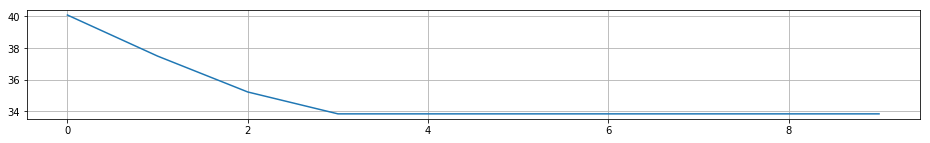

In [22]:
print('예측주가 : {} \nstderr : {} \nupper bound : {} \nlower bound : {}'.format(
    fore[0], 
    fore[1][0], 
    fore[2][0][0], 
    fore[2][0][1]))

pd.Series(fore[0]).plot(figsize=(16,2), grid=True)